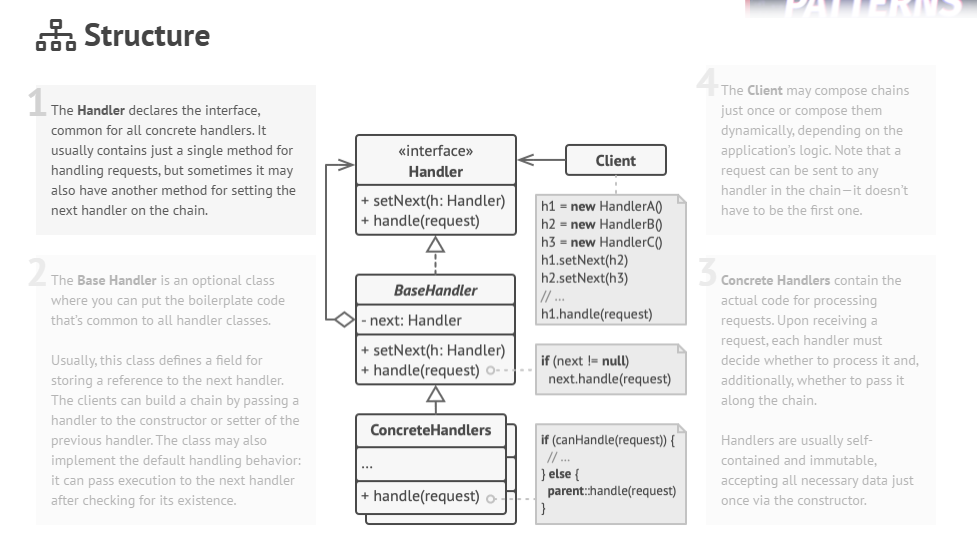

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import Any, Optional


class Handler(ABC):
    """
    The Handler interface declares a method for building the chain of handlers.
    It also declares a method for executing a request.
    """

    @abstractmethod
    def set_next(self, handler: Handler) -> Handler:
        pass

    @abstractmethod
    def handle(self, request) -> Optional[str]:
        pass


class AbstractHandler(Handler):
    """
    The default chaining behavior can be implemented inside a base handler
    class.
    """

    _next_handler: Handler = None

    def set_next(self, handler: Handler) -> Handler:
        self._next_handler = handler
        # Returning a handler from here will let us link handlers in a
        # convenient way like this:
        # monkey.set_next(squirrel).set_next(dog)
        return handler

    @abstractmethod
    def handle(self, request: Any) -> str:
        if self._next_handler:
            return self._next_handler.handle(request)

        return None


"""
All Concrete Handlers either handle a request or pass it to the next handler in
the chain.
"""


class MonkeyHandler(AbstractHandler):
    def handle(self, request: Any) -> str:
        if request == "Banana":
            return f"Monkey: I'll eat the {request}"
        else:
            return super().handle(request)


class SquirrelHandler(AbstractHandler):
    def handle(self, request: Any) -> str:
        if request == "Nut":
            return f"Squirrel: I'll eat the {request}"
        else:
            return super().handle(request)


class DogHandler(AbstractHandler):
    def handle(self, request: Any) -> str:
        if request == "MeatBall":
            return f"Dog: I'll eat the {request}"
        else:
            return super().handle(request)


def client_code(handler: Handler) -> None:
    """
    The client code is usually suited to work with a single handler. In most
    cases, it is not even aware that the handler is part of a chain.
    """

    for food in ["Nut", "Banana", "Cup of coffee"]:
        print(f"\nClient: Who wants a {food}?")
        result = handler.handle(food)
        if result:
            print(f"  {result}", end="")
        else:
            print(f"  {food} was left untouched.", end="")


if __name__ == "__main__":
    monkey = MonkeyHandler()
    squirrel = SquirrelHandler()
    dog = DogHandler()

    monkey.set_next(squirrel).set_next(dog)

    # The client should be able to send a request to any handler, not just the
    # first one in the chain.
    print("Chain: Monkey > Squirrel > Dog")
    client_code(monkey)
    print("\n")

    print("Subchain: Squirrel > Dog")
    client_code(squirrel)

Chain: Monkey > Squirrel > Dog

Client: Who wants a Nut?
  Squirrel: I'll eat the Nut
Client: Who wants a Banana?
  Monkey: I'll eat the Banana
Client: Who wants a Cup of coffee?
  Cup of coffee was left untouched.

Subchain: Squirrel > Dog

Client: Who wants a Nut?
  Squirrel: I'll eat the Nut
Client: Who wants a Banana?
  Banana was left untouched.
Client: Who wants a Cup of coffee?
  Cup of coffee was left untouched.